# Split coverage + molecule viewer

In [1]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Draw
from IPython.display import display, HTML

In [14]:
train = pd.read_csv('datasets/chembl_pretraining_train_nomissing.csv')
val   = pd.read_csv('datasets/chembl_pretraining_val_nomissing.csv')
test  = pd.read_csv('datasets/chembl_pretraining_test_nomissing.csv')
protein_cols = [c for c in train.columns if c != 'smiles' and c in val.columns and c in test.columns]

In [15]:
def coverage(train, val, test, proteins):
    rows = []
    for p in proteins:
        ct = int(train[p].notna().sum())
        cv = int(val[p].notna().sum())
        cte = int(test[p].notna().sum())
        rows.append([p, ct, cv, cte, ct+cv+cte, (ct==0 or cv==0 or cte==0)])
    return pd.DataFrame(rows, columns=['protein','count_train','count_val','count_test','count_total','flag_zero']).set_index('protein').sort_values('count_total')
cov = coverage(train, val, test, protein_cols)
missing_proteins = cov[cov['flag_zero']].index.tolist()
cov.loc[missing_proteins].head(20)

,count_train,count_val,count_test,count_total,flag_zero
protein,,,,,


In [4]:
def grid(smiles_list, max_n=48, mols_per_row=6):
    sm = smiles_list[:max_n]
    mols = [Chem.MolFromSmiles(s) for s in sm]
    mols = [m for m in mols if m is not None]
    if not mols:
        return None
    return Draw.MolsToGridImage(mols, molsPerRow=mols_per_row, useSVG=False)
def show_protein(protein, max_per_split=48, mols_per_row=6):
    sm_tr = train.loc[train[protein].notna(), 'smiles'].tolist()
    sm_va = val.loc[val[protein].notna(), 'smiles'].tolist()
    sm_te = test.loc[test[protein].notna(), 'smiles'].tolist()
    display(HTML(f"<h3>{protein}</h3>"))
    display(HTML(f"<b>train</b> (n={len(sm_tr)})"))
    img = grid(sm_tr, max_n=max_per_split, mols_per_row=mols_per_row)
    display(img if img is not None else HTML("no molecules"))
    display(HTML(f"<b>val</b> (n={len(sm_va)})"))
    img = grid(sm_va, max_n=max_per_split, mols_per_row=mols_per_row)
    display(img if img is not None else HTML("no molecules"))
    display(HTML(f"<b>test</b> (n={len(sm_te)})"))
    img = grid(sm_te, max_n=max_per_split, mols_per_row=mols_per_row)
    display(img if img is not None else HTML("no molecules"))

In [5]:
missing_proteins

['CDKL1',
 'DCAMKL1',
 'CTK',
 'RIPK5',
 'NEK7',
 'NIM1',
 'TLK2',
 'ERK4',
 'LOK',
 'MAP3K3',
 'MYO3A',
 'WNK1',
 'NDR2',
 'PHKG2',
 'OSR1',
 'RIOK2',
 'ERK3',
 'SgK110',
 'MAST1',
 'HUNK',
 'YSK4',
 'WEE2',
 'ANKK1',
 'YANK1',
 'DCAMKL3']

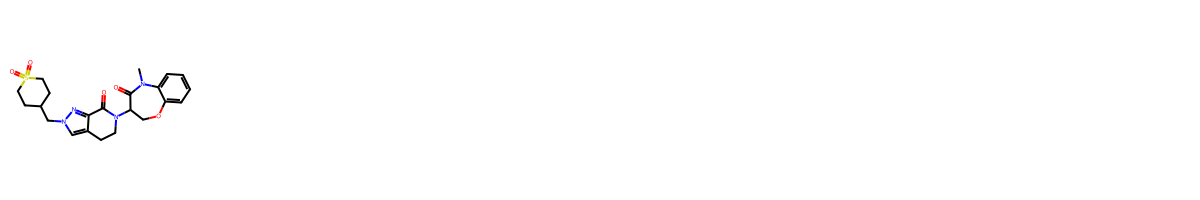

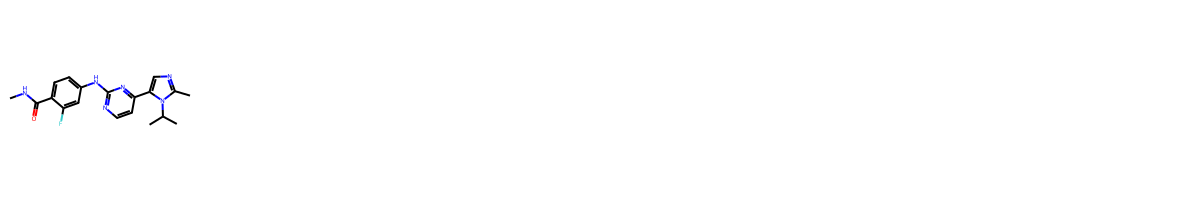

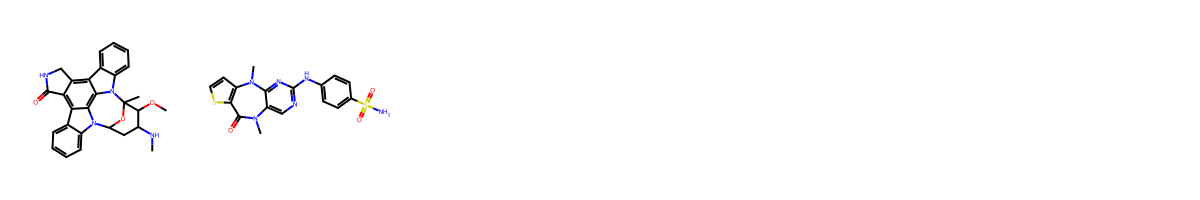

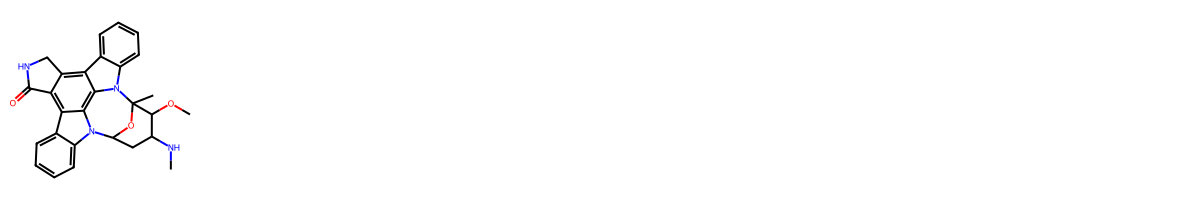

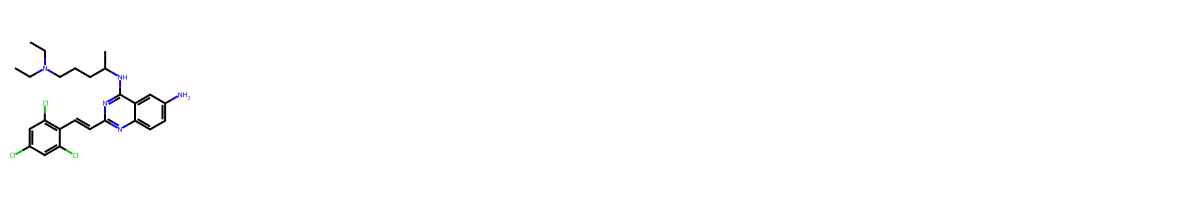

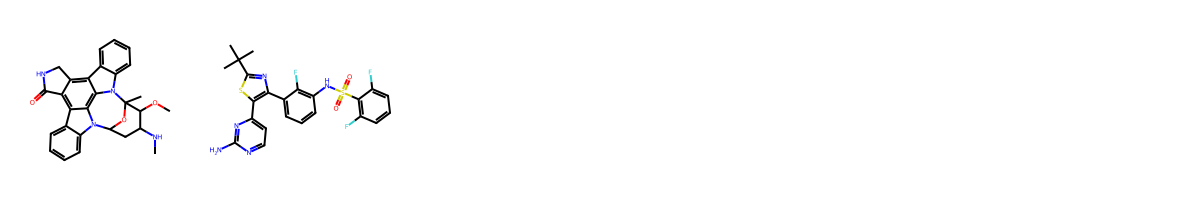

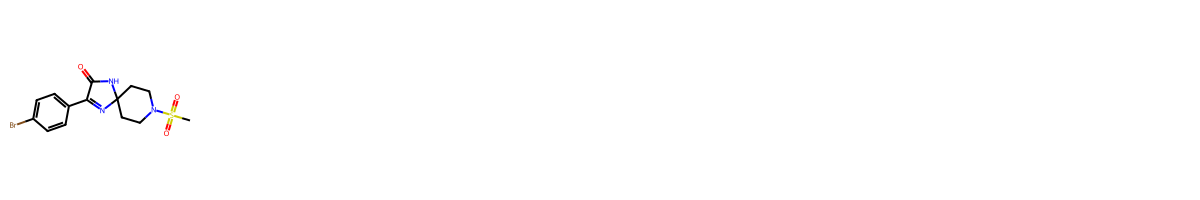

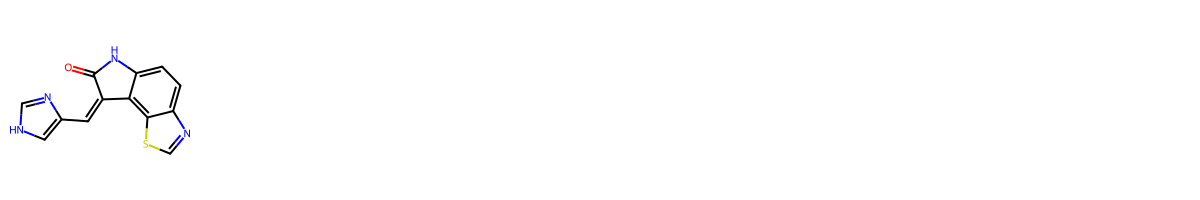

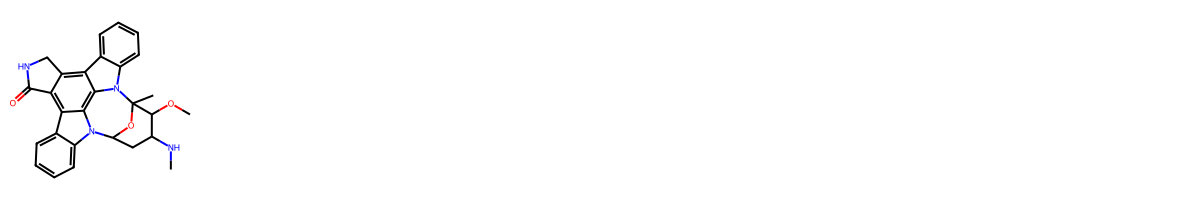

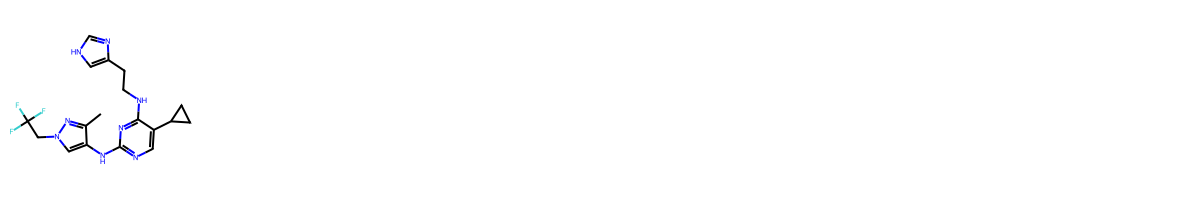

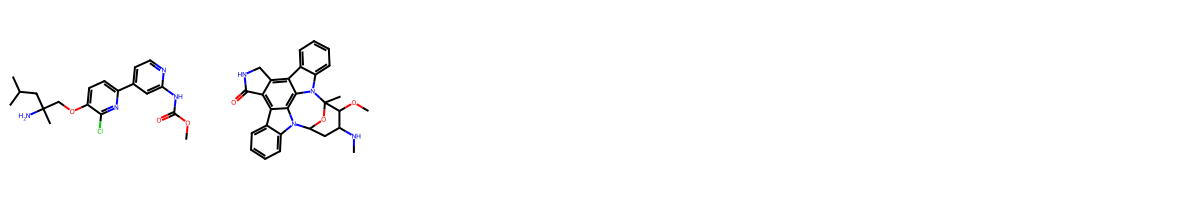

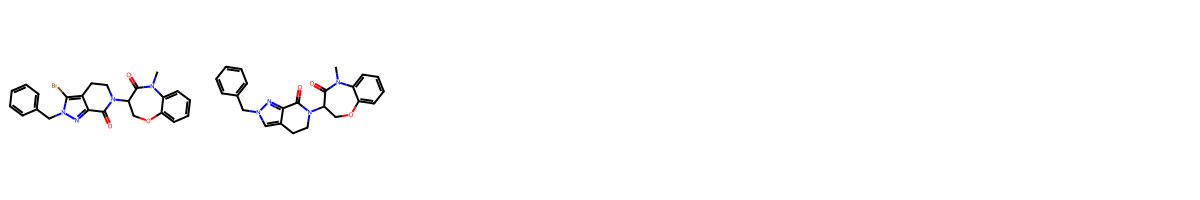

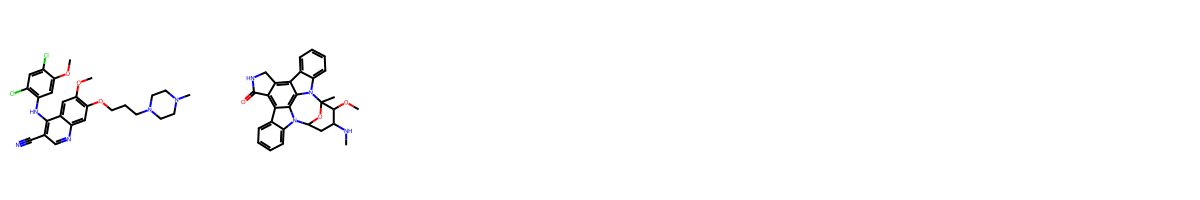

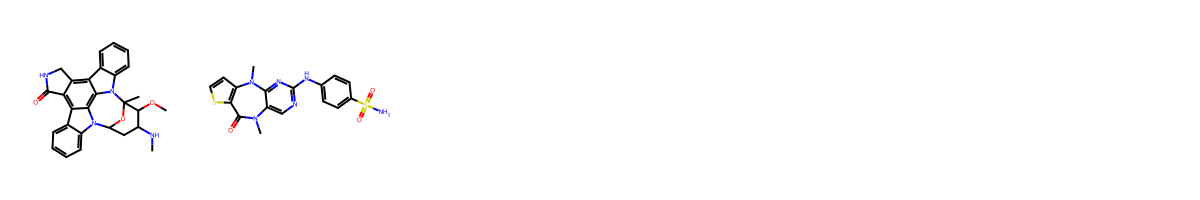

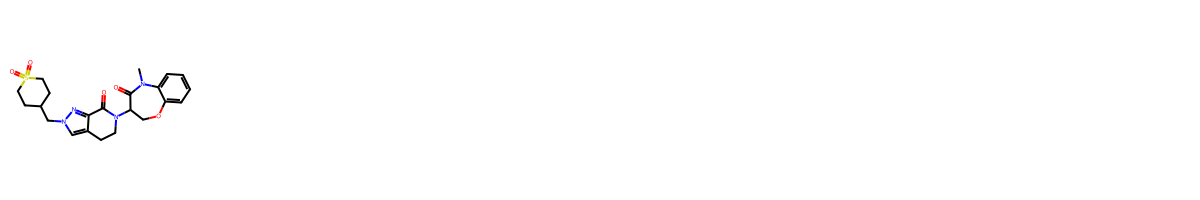

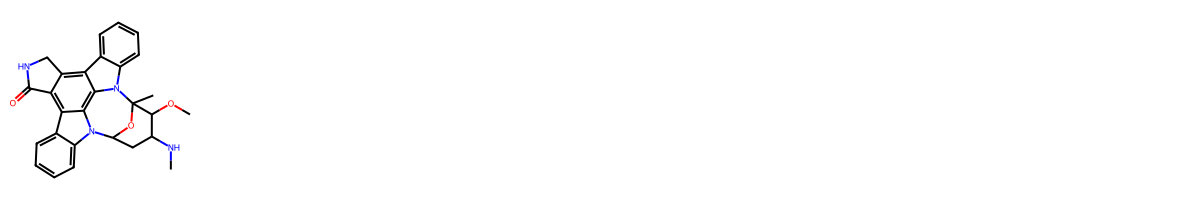

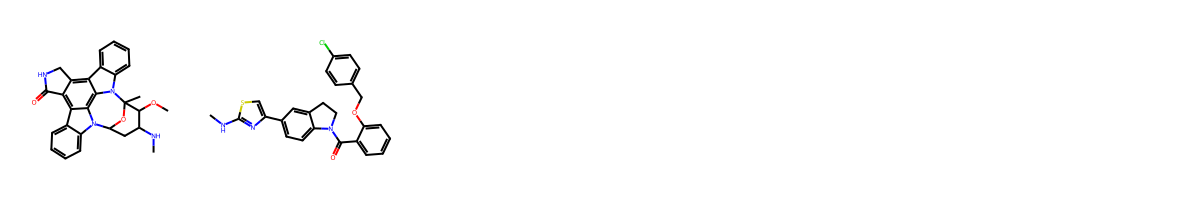

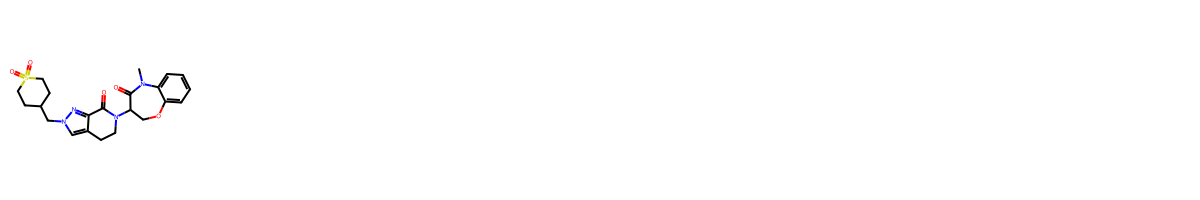

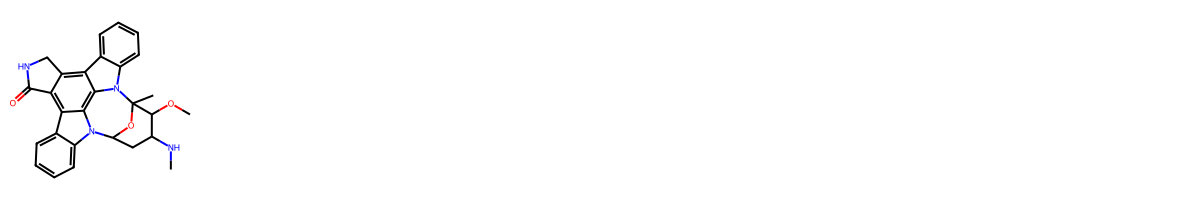

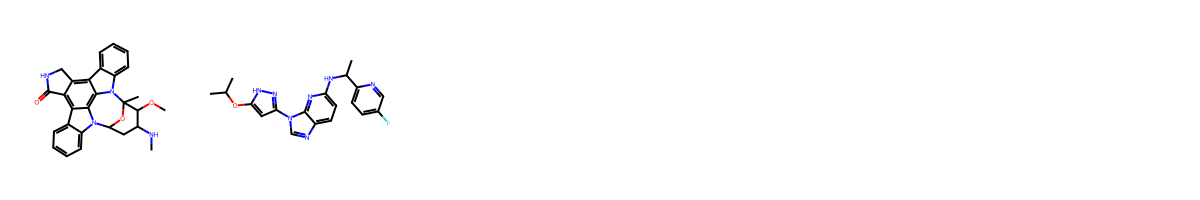

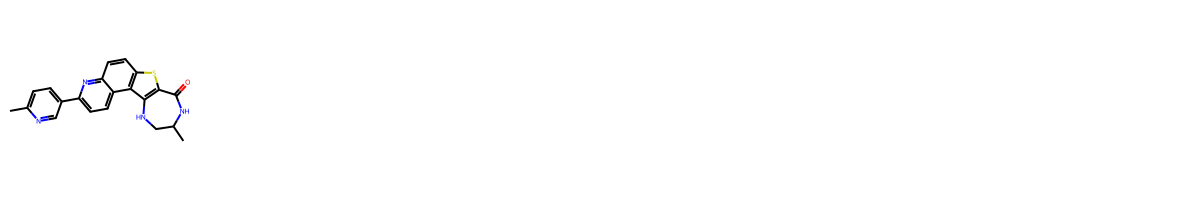

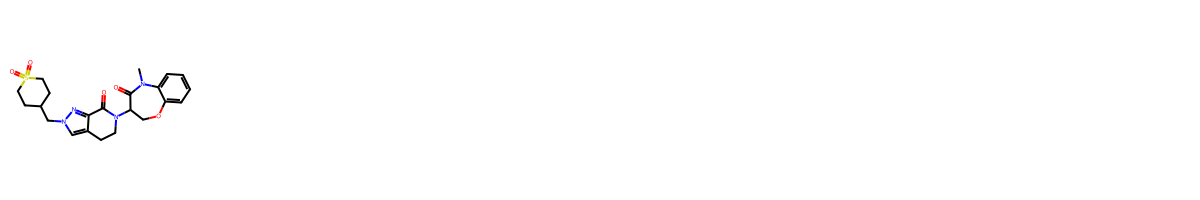

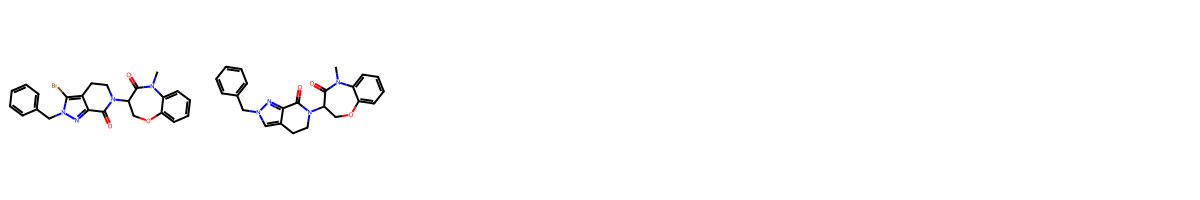

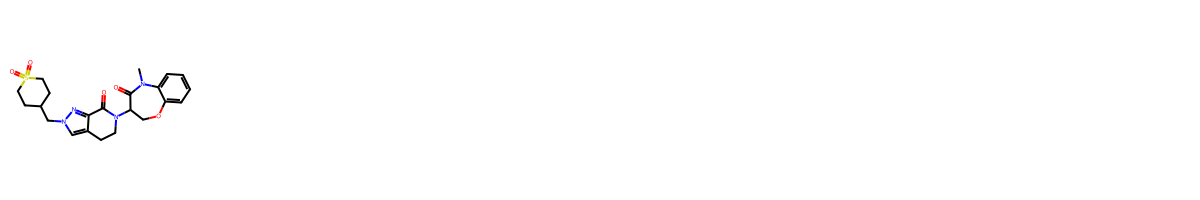

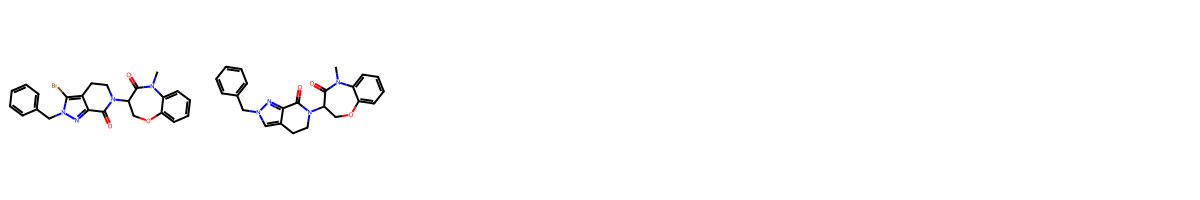

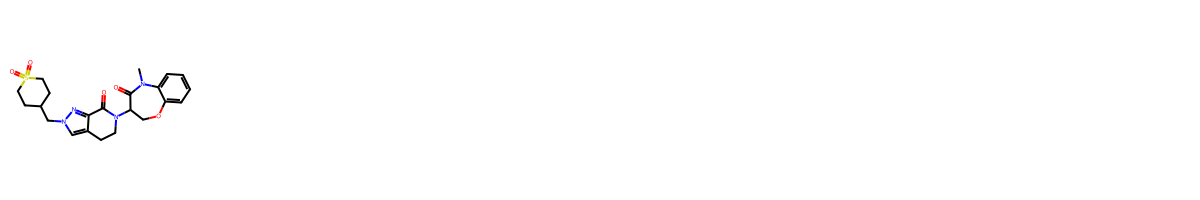

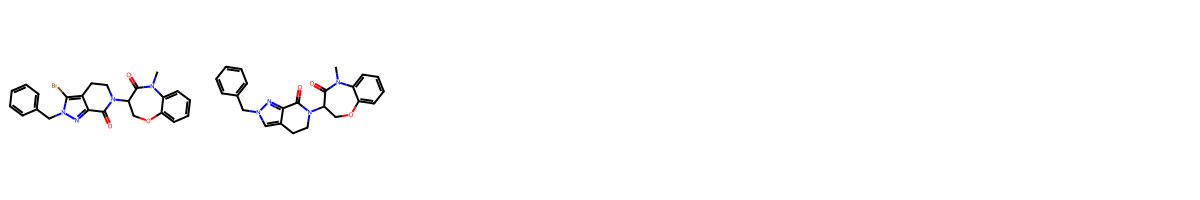

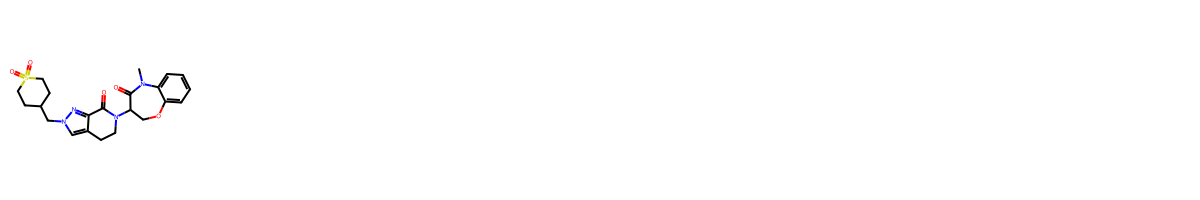

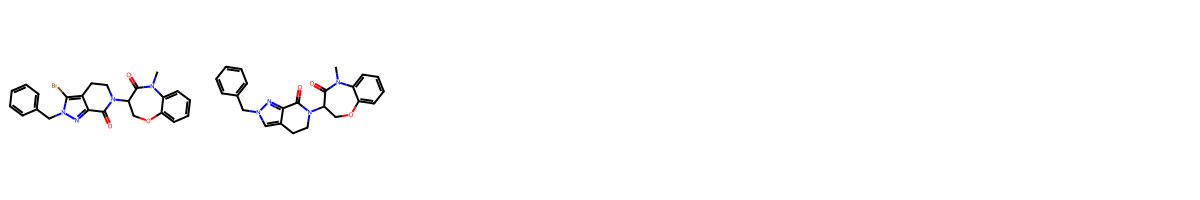

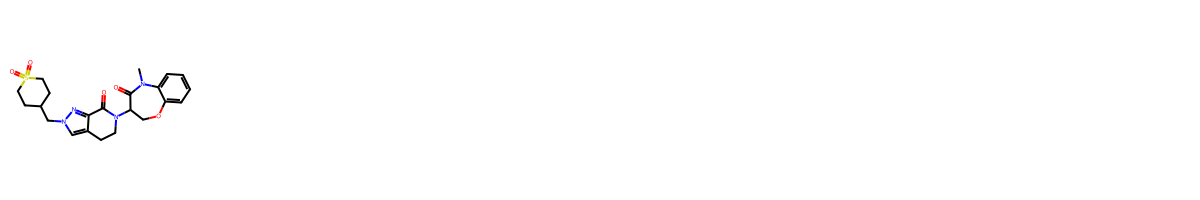

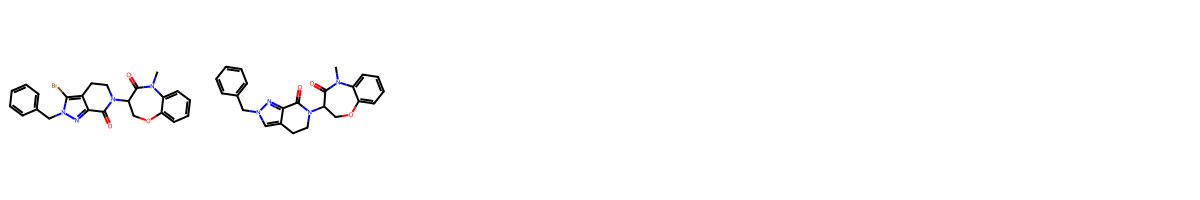

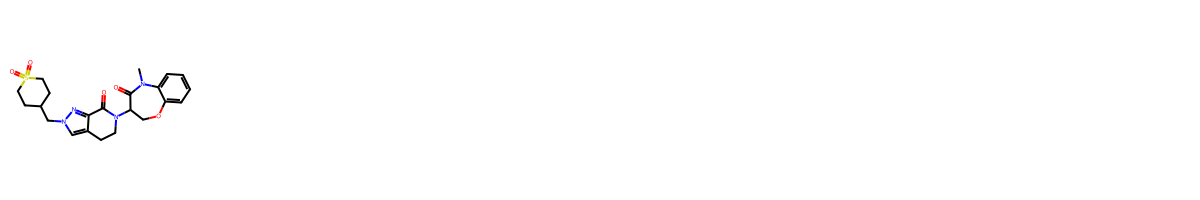

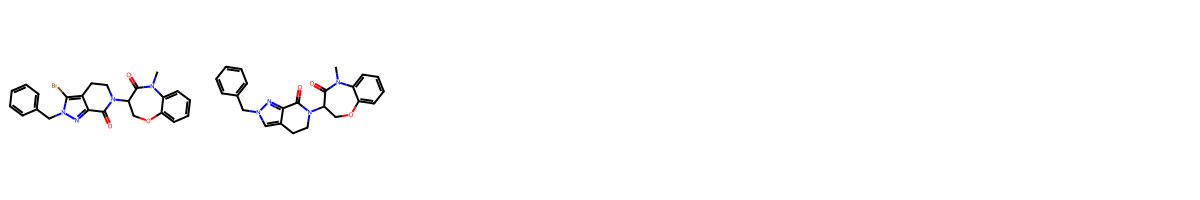

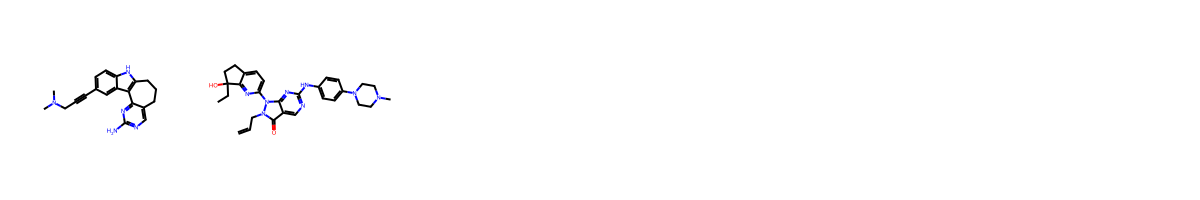

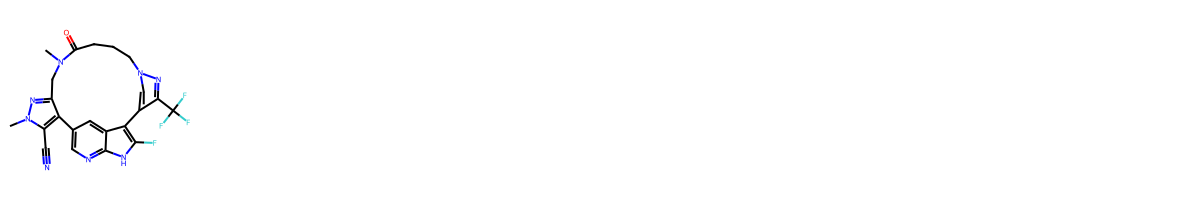

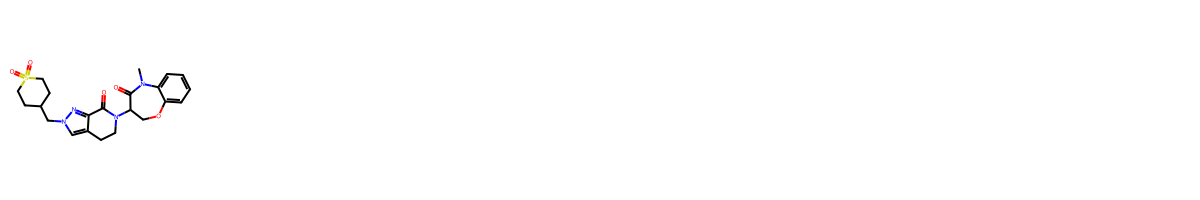

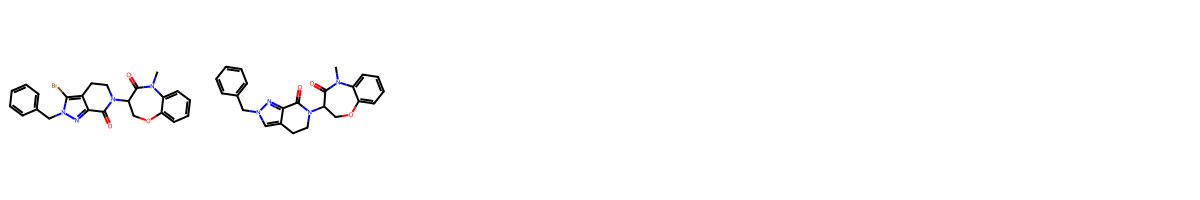

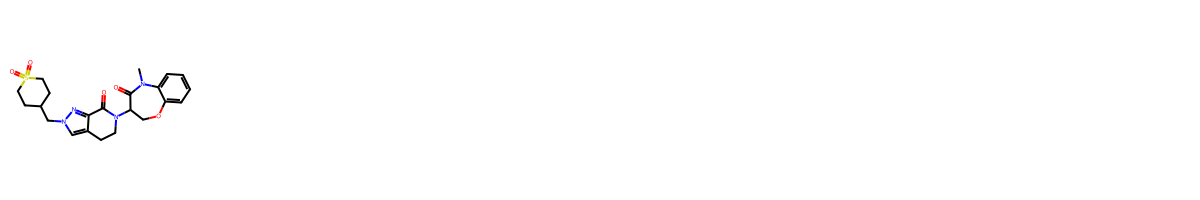

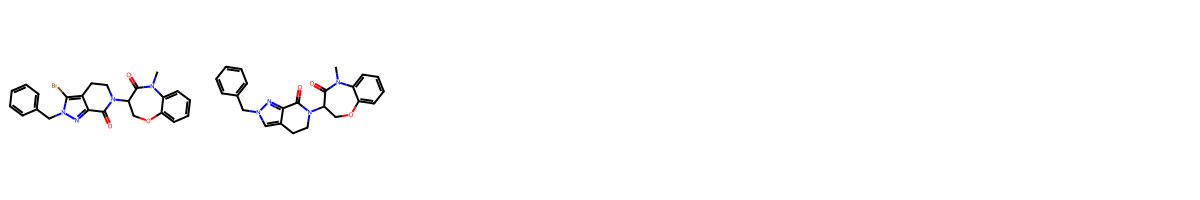

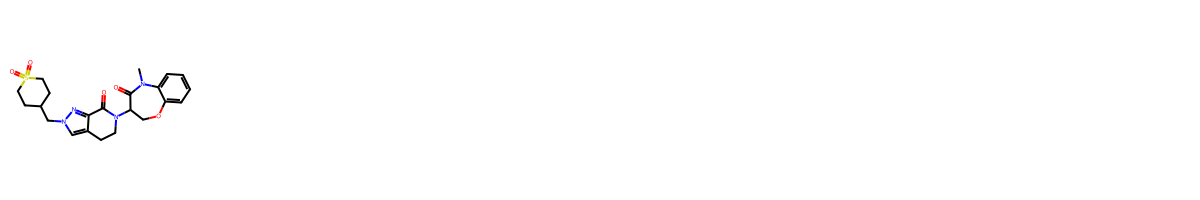

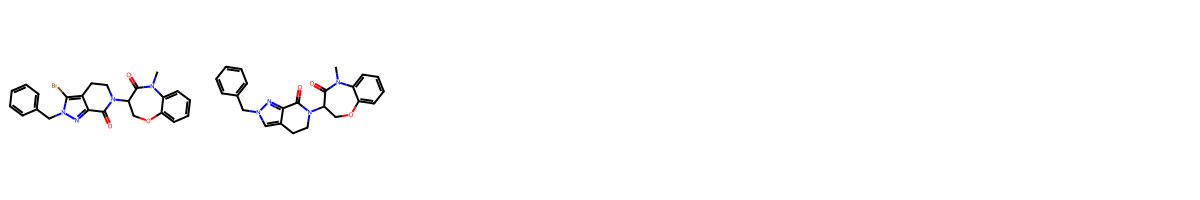

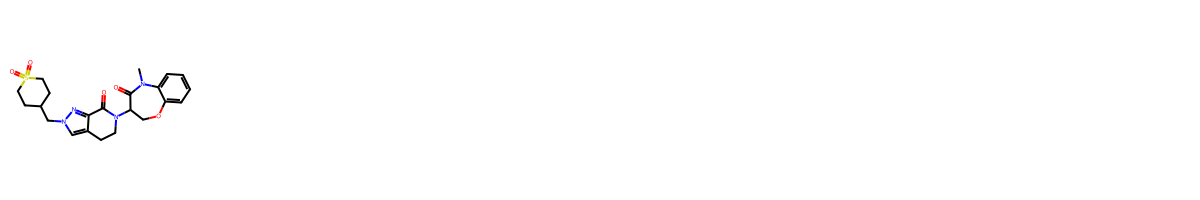

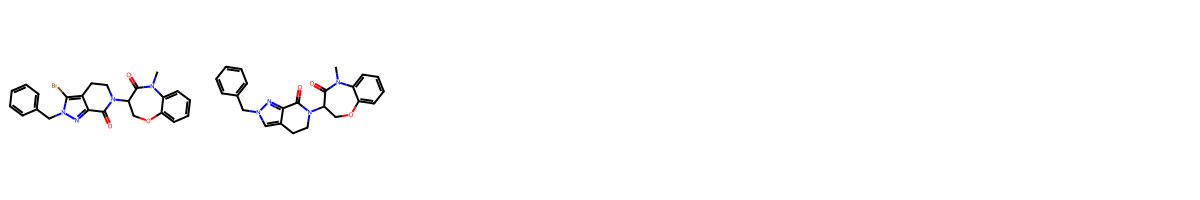

In [11]:
for p in missing_proteins:
    show_protein(p, max_per_split=48, mols_per_row=6)

In [13]:
keep_cols = ['smiles'] + [p for p in protein_cols if p not in missing_proteins]
train[keep_cols].to_csv('datasets/chembl_pretraining_train_nomissing.csv', index=False)
val[keep_cols].to_csv('datasets/chembl_pretraining_val_nomissing.csv', index=False)
test[keep_cols].to_csv('datasets/chembl_pretraining_test_nomissing.csv', index=False)
